In [17]:
!pip install gym_anytrading
!pip install stable_baselines3

##Load Necessary Packages and Data

In [116]:
import gymnasium as gym
import gym_anytrading
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import BaseCallback
import pandas as pd
import matplotlib.pyplot as plt
from stable_baselines3.common.evaluation import evaluate_policy
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [151]:
# Load the dataset
df = pd.read_csv('gmedata.csv')

# Preprocess the data (we note that the data is stored in reverse chronological order)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.iloc[::-1]

RANGE_LO = 50
RANGE_HI = 100
WINDOW = 10

# Exampel portion of the data
df.iloc[RANGE_LO:RANGE_HI]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Volume
Date,,,,,
2020-05-27,4.57,4.71,4.36,4.69,"3,146,603"
2020-05-28,4.75,4.76,4.30,4.33,"2,184,367"
2020-05-29,4.33,4.42,4.05,4.06,"3,973,540"
2020-06-01,4.12,4.36,4.02,4.13,"2,618,424"
2020-06-02,4.27,4.31,4.06,4.18,"2,369,780"
2020-06-03,4.24,4.52,4.20,4.44,"3,037,424"
2020-06-04,4.44,4.72,4.37,4.47,"3,514,299"
2020-06-05,4.29,4.41,4.09,4.14,"6,274,428"
2020-06-08,4.28,5.14,4.27,5.01,"10,133,660"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


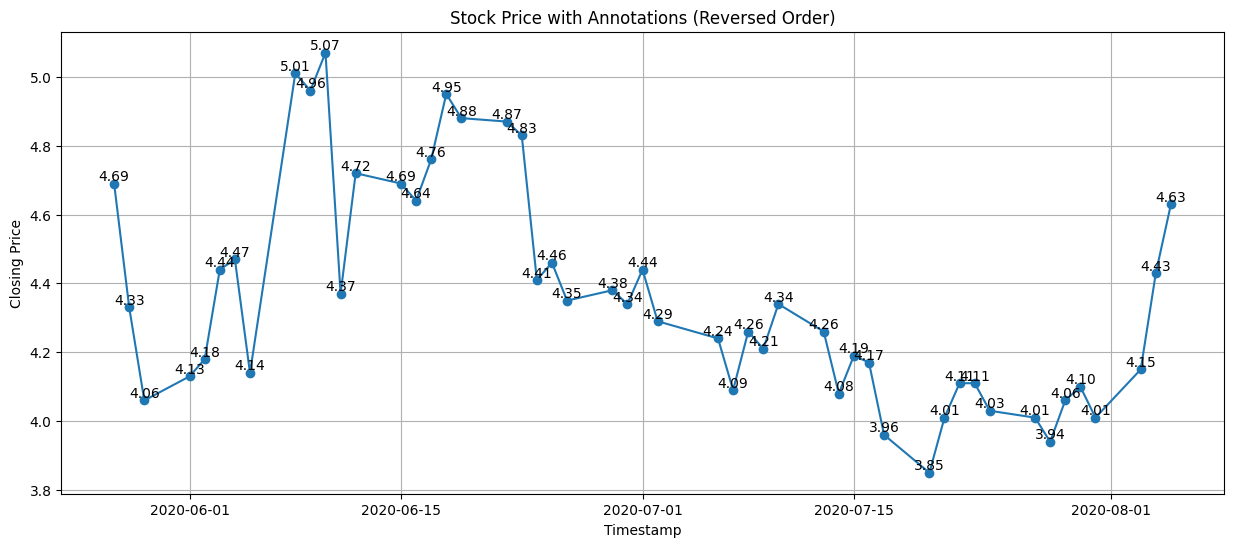

In [155]:
plot_data = df.iloc[RANGE_LO:RANGE_HI]

# Create the plot
plt.figure(figsize=(15,6))
plt.plot(plot_data.index, plot_data['Close'], marker='o')  # Plot with markers

# Annotate each point with its value, in reversed order
for i, (index, row) in enumerate(plot_data.iterrows()):
    # Adjust text annotation to account for the reversed order
    plt.text(index, row['Close'], f'{row["Close"]:.2f}', ha='center', va='bottom')

plt.xlabel('Timestamp')
plt.ylabel('Closing Price')
plt.title('Stock Price with Annotations (Reversed Order)')
plt.grid(True)
plt.show()

##Baseline: No Learning

In [156]:
# Create and wrap the environment
env = gym.make('stocks-v0', df=df, frame_bound=(RANGE_LO,RANGE_HI), window_size=WINDOW)

In [157]:
baseline_rewards = []
baseline_profits = []
for _ in range(100):
    obs, _ = env.reset()
    while True:
        action = np.random.randint(2)
        obs, rewards, term, trun, info = env.step(action)

        done = term or trun
        if done:
            baseline_rewards.append(info['total_reward'])
            baseline_profits.append(info['total_profit'])
            break

print(f"Average Reward: {np.mean(baseline_rewards)} ± {np.std(baseline_rewards)}")
print(f"Average Profit: {np.mean(baseline_profits)} ± {np.std(baseline_profits)}")

Average Reward: 0.11890016555786133 ± 0.731071817959765
Average Profit: 0.8764410208844603 ± 0.14012780698107974


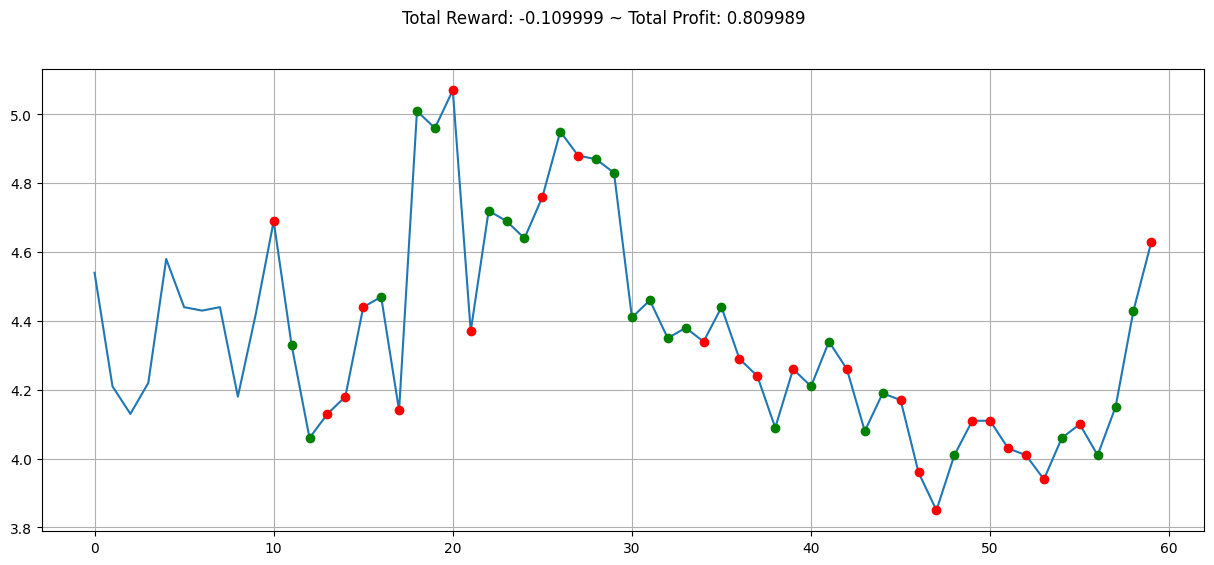

In [158]:
# Example of an episode of the environment
# Note: Total profit must be greater than 1 to have actually gotten a profit (sometimes randomly buying and selling would result in a profit but this is not what we would like)
plt.figure(figsize=(15,6))
plt.cla()
plt.grid()
env.unwrapped.render_all()
plt.show()

##Baseline: StableBaselines

In [159]:
# NOT USED
class RewardLogger(BaseCallback):
    def __init__(self, verbose=1):
        super(RewardLogger, self).__init__(verbose)
        self.episode_rewards = []

    def _on_step(self) -> bool:
        info = self.locals["infos"][0]  # Assuming a single environment
        # Check if the episode has ended
        if 'episode' in info.keys():
            # Retrieve the episode reward from the Monitor wrapper
            episode_reward = info['episode']['r']
            self.episode_rewards.append(episode_reward)
            if self.verbose:
                print(f"Episode: {len(self.episode_rewards)}, Reward: {episode_reward}")
        return True

    def _on_training_end(self):
        # Plot the rewards after training is complete
        plt.figure(figsize=(12, 6))
        plt.plot(self.episode_rewards)
        plt.xlabel('Episode')
        plt.ylabel('Reward')
        plt.title('Rewards per Episode')
        plt.grid(True)
        plt.show()

In [160]:
# Create and wrap the environment
env = gym.make('stocks-v0', df=df, frame_bound=(RANGE_LO,RANGE_HI), window_size=WINDOW)

# Initialize the agent
model = DQN('MlpPolicy', env, verbose=1,
            exploration_initial_eps=1.0,  # Start with full exploration
            exploration_final_eps=0.01,  # Lower final epsilon for more exploitation
            exploration_fraction=0.3,  # Adjust exploration fraction
            buffer_size=2000,  # Specify replay buffer size
            learning_starts=2000,  # Start learning after 1000 steps
            batch_size=64,  # Adjust batch size
            gamma=0.995,  # Discount factor
            target_update_interval=100)  # Update the target network every 100 steps

# callback = RewardLogger()

# Train the agent
model.learn(total_timesteps=50000)
# model.learn(total_timesteps=25000, callback=callback)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | -0.48    |
|    exploration_rate | 0.987    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 6636     |
|    time_elapsed     | 0        |
|    total_timesteps  | 196      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | -0.48    |
|    exploration_rate | 0.974    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 6779     |
|    time_elapsed     | 0        |
|    total_timesteps  | 392      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | -0.48  

In [161]:
# Evaluate the trained agent
obs, _ = env.reset()
step = 10
while True:
    step += 1
    action, _states = model.predict(obs, deterministic=True)
    new_obs, rewards, term, trun, info = env.step(action)
    print(f"Step: {step} ~ State: {obs[-1][0]} ~ Action: {'Sell' if action == 0 else 'Buy'} ~ Reward: {rewards} ~ Info: {info}")

    done = term or trun
    if done:
        print("info:", info)
        break
    obs = new_obs

Step: 11 ~ State: 4.690000057220459 ~ Action: Buy ~ Reward: 0 ~ Info: {'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Long: 1>}
Step: 12 ~ State: 4.329999923706055 ~ Action: Buy ~ Reward: 0 ~ Info: {'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Long: 1>}
Step: 13 ~ State: 4.059999942779541 ~ Action: Buy ~ Reward: 0 ~ Info: {'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Long: 1>}
Step: 14 ~ State: 4.130000114440918 ~ Action: Buy ~ Reward: 0 ~ Info: {'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Long: 1>}
Step: 15 ~ State: 4.179999828338623 ~ Action: Sell ~ Reward: 0.1100001335144043 ~ Info: {'total_reward': 0.1100001335144043, 'total_profit': 1.010074395710756, 'position': <Positions.Short: 0>}
Step: 16 ~ State: 4.440000057220459 ~ Action: Buy ~ Reward: 0 ~ Info: {'total_reward': 0.1100001335144043, 'total_profit': 1.010074395710756, 'position': <Positions.Long: 1>}
Step: 17 ~ State: 4.46999979019165 ~ Action: Bu

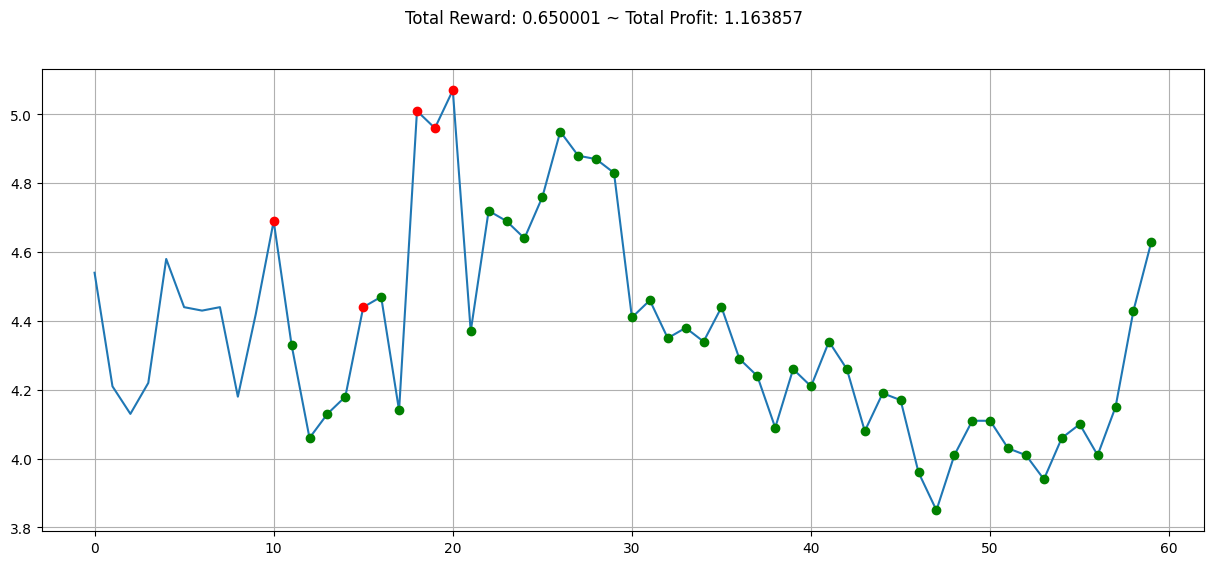

In [162]:
# Render the environment to visualize the agent's performance
plt.figure(figsize=(15,6))
plt.cla()
plt.grid()
env.unwrapped.render_all()
plt.show()

We see that the StableBaselines DQN helped the model learn with higher rewards compared to randomly choosing actions. It also had a higher profit, in turn, as well.

##Custom: Our DQN

In [168]:
# Import necessary packages
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import random
import gymnasium as gym
import gym_anytrading
import pandas as pd
from collections import deque, namedtuple
import matplotlib.pyplot as plt
import pandas as pd
import torch.optim as optim

In [176]:
# Define necessary constants
HIDDEN_LAYER1 = 64
HIDDEN_LAYER2 = 64
REPLAY_BUFF_SIZE = 1000
EPSILON = 1.0
MIN_EPS = 0.01
EXPLORE_FRAC = 0.3
BATCH_SIZE = 128
GAMMA = 0.995
LEARN_RATE = 0.005
UPDATE_EVERY = 100
EPISODES = 250

In [177]:
class DQN(nn.Module):

    def __init__(self, input_dim, n_actions):
        super(DQN, self).__init__()
        self.policy_net = nn.Sequential(
            nn.Linear(input_dim, HIDDEN_LAYER1),
            nn.ReLU(),
            nn.Linear(HIDDEN_LAYER1, HIDDEN_LAYER2),
            nn.ReLU(),
            nn.Linear(HIDDEN_LAYER2, n_actions)
        )

    def forward(self, state):
        return self.policy_net(state)

In [178]:
class ReplayMemory(object):

    def __init__(self, capacity=REPLAY_BUFF_SIZE):
        self.memory = deque([], maxlen=capacity)

    def push(self, *args):
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

In [179]:
class DQNAgent():

    def __init__(self, input_dim, n_actions, eps=EPSILON, lr=LEARN_RATE):
        self.memory = ReplayMemory()

        self.input_dim = input_dim
        self.n_actions = n_actions
        self.eps = eps

        self.policy_net = DQN(self.input_dim, self.n_actions)
        self.target_net = DQN(self.input_dim, self.n_actions)

        self.target_net.load_state_dict(self.policy_net.state_dict())
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=lr)
        self.t = 1


    def select_action(self, state):

        sample = random.random()

        if sample > self.eps:
            with torch.no_grad():
                return self.policy_net(state).max(1)[1].view(1, 1)

        return torch.tensor([[env.action_space.sample()]], dtype=torch.long)


    def optimize(self, batch_size=BATCH_SIZE, gamma=GAMMA):
        if len(self.memory) < batch_size:
            self.t += 1
            return

        # get transitions from replaymemory
        transitions = self.memory.sample(batch_size)
        batch = Transition(*zip(*transitions))


        # boolean mapping of TF for terminal or nonterminal states
        non_terminal_states = torch.tensor(tuple(map(lambda s: s is not None,
                                                batch.next_state)), dtype=torch.bool)
        # get non terminal next states
        non_terminal_next_states = torch.cat([s for s in batch.next_state if s is not None])

        # get next state values and set terminal states to 0
        next_state_batch = torch.zeros(batch_size) # will store the max future q_val of next_state
        with torch.no_grad():
            next_state_batch[non_terminal_states] = self.target_net(
                non_terminal_next_states).max(1)[0]

        state_batch = torch.cat(batch.state)
        action_batch = torch.cat(batch.action)


        #reward_batch = torch.cat(batch.reward)
        reward_batch = torch.cat([torch.tensor([reward], dtype=torch.float32) for reward in batch.reward])


        # Compute Q(s_t, a)
        state_action_values = self.policy_net(state_batch).gather(1, action_batch)


        # Compute the expected Q values
        expected_state_action_values = (next_state_batch * gamma) + reward_batch
        # Compute loss
        criterion = nn.MSELoss()
        loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))

        # Optimize the model
        self.optimizer.zero_grad()
        loss.backward()
        # In-place gradient clipping
        torch.nn.utils.clip_grad_value_(self.policy_net.parameters(), 100)
        self.optimizer.step()
        self.t += 1

In [191]:
def train(env, agent, T):

    rewards = []
    episode_reward = 0

    state, _ = env.reset()
    state = state.flatten()
    state = torch.tensor([state], dtype=torch.float32)

    for t in range(T):

        action = agent.select_action(state)

        next_state, reward, terminated, truncated, info = env.step(action.item())
        done = terminated or truncated

        rewards.append(reward)
        episode_reward += reward

        if done:
            next_state = None
            agent.eps -= EPSILON / (EPISODES * EXPLORE_FRAC)
            agent.eps = max(agent.eps, MIN_EPS)
        else:
            next_state = next_state.flatten()
            next_state = torch.tensor([next_state], dtype=torch.float32)

        agent.memory.push(state, action, next_state, reward)
        agent.optimize()
        state = next_state



        if agent.t % UPDATE_EVERY == 0:
            target_net_state_dict = agent.target_net.state_dict()
            policy_net_state_dict = agent.policy_net.state_dict()
            for key in policy_net_state_dict:
                target_net_state_dict[key] = policy_net_state_dict[key]
            agent.target_net.load_state_dict(target_net_state_dict)

        if done:
            break

    return episode_reward, info

In [188]:
df = pd.read_csv('gmedata.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[['Open', 'Close']].iloc[::-1]


env = gym.make('stocks-v0', df=df, frame_bound=(50,100), window_size=10)
input_dim = env.observation_space.shape[1] * env.observation_space.shape[0]
n_actions = env.action_space.n
T = env.unwrapped.frame_bound[1] - env.frame_bound[0]

agent = DQNAgent(input_dim, n_actions)
Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward'))

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.frame_bound to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.frame_bound` for environment variables or `env.get_wrapper_attr('frame_bound')` that will search the reminding wrappers.
  logger.warn(


Episode: 1, Reward: -0.48000001907348633
info:  {'total_reward': -0.48000001907348633, 'total_profit': 0.7999671743289447, 'position': <Positions.Short: 0>}

Episode: 2, Reward: -0.48000001907348633
info:  {'total_reward': -0.48000001907348633, 'total_profit': 0.7999671743289447, 'position': <Positions.Short: 0>}

Episode: 3, Reward: -0.9699997901916504
info:  {'total_reward': -0.9699997901916504, 'total_profit': 0.7997279058543036, 'position': <Positions.Long: 1>}

Episode: 4, Reward: -0.48000001907348633
info:  {'total_reward': -0.48000001907348633, 'total_profit': 0.7999671743289447, 'position': <Positions.Short: 0>}

Episode: 5, Reward: -1.1999998092651367
info:  {'total_reward': -1.1999998092651367, 'total_profit': 0.7567879930052651, 'position': <Positions.Long: 1>}

Episode: 6, Reward: 0.18000078201293945
info:  {'total_reward': 0.18000078201293945, 'total_profit': 0.9084835013006772, 'position': <Positions.Long: 1>}

Episode: 7, Reward: -0.039999961853027344
info:  {'total_rewa

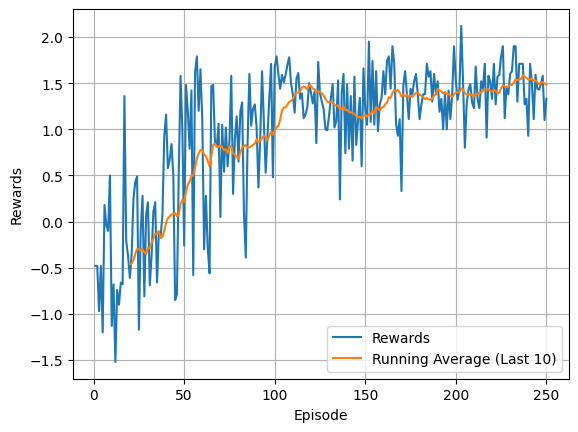

In [189]:
x = []
y = []
for episode in range(EPISODES):
    reward, info = train(env, agent, T)
    print(f"Episode: {episode+1}, Reward: {reward}")
    print("info: ", info)
    print()
    x.append(episode + 1)
    y.append(reward)


x = np.array(x)  # Ensure x is a numpy array for consistent indexing
y = np.array(y)  # Ensure y is a numpy array

# Calculate the running average of the last 10 values
window_size = 20
weights = np.ones(window_size) / window_size
y_avg = np.convolve(y, weights, mode='valid')

# Plot the original rewards
plt.plot(x, y, label='Rewards')

# Plot the running average
# Note: The running average will have fewer points, adjust the x-axis accordingly
plt.plot(x[window_size - 1: ], y_avg, label='Running Average (Last 10)')

plt.xlabel("Episode")
plt.ylabel("Rewards")
plt.grid()
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


info {'total_reward': 1.330000400543213, 'total_profit': 1.2096508600969007, 'position': <Positions.Long: 1>}


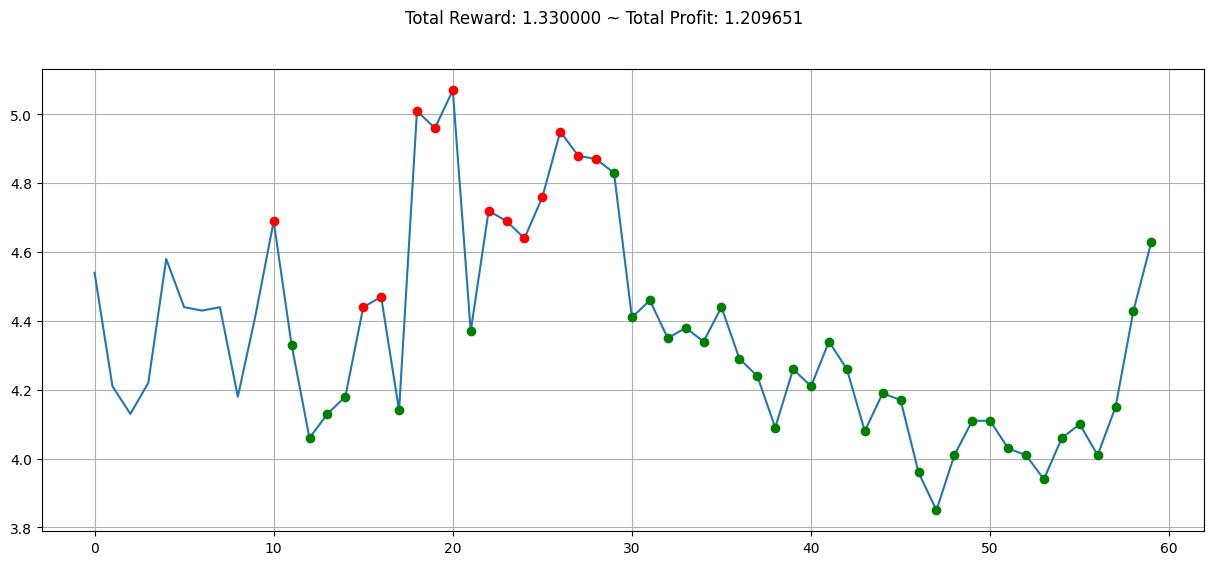

In [190]:
state, _ = env.reset()
agent.eps = 0 # set it to 0 so we are using deterministic model
state = state.flatten()
state = torch.tensor([state], dtype=torch.float32)
while True:
    action = agent.policy_net(state).max(1)[1].view(1, 1)
    next_state, reward, terminated, truncated, info = env.step(action.item())
    done = terminated or truncated

    if done:
        print("info", info)
        break
    else:
        next_state = next_state.flatten()
        next_state = torch.tensor([next_state], dtype=torch.float32)
        state = next_state


plt.figure(figsize=(15,6))
plt.cla()
env.unwrapped.render_all()
plt.grid()
plt.show()